In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "pollution" #sinus, helix
n_instance = 400
n_features = 2
n_var =int(vars[0,j])
latent_space =6 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 3000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


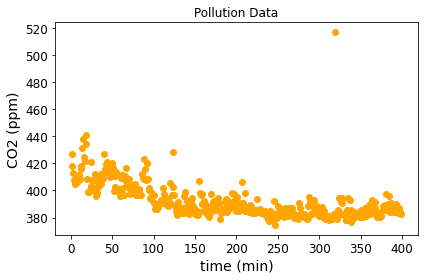

In [3]:
X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

concentration = X_train
time = y_train

plt.scatter(concentration,time, c='orange', label='Sample Data')
plt.title("Pollution Data")

plt.ylabel('CO2 (ppm)')
plt.xlabel('time (min)')
plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# WGAN

### Architecture

In [5]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [6]:
wgan = WGAN_Model_2D.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 820       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2541      
Total params: 3,361
Trainable params: 3,261
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (99, 2)
Cycles:  4
X_train (399, 1)
y_train (399, 1)
X_train_scaled (399, 2)


In [8]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (99, 2)


## Training

In [9]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/3000
critic: 7.610781 - generator: -0.008693 - 5s
Epoch 2/3000
critic: 4.578220 - generator: -0.015420 - 0s
Epoch 3/3000
critic: 2.867556 - generator: -0.021406 - 0s
Epoch 4/3000
critic: 1.527122 - generator: -0.017735 - 0s
Epoch 5/3000
critic: 0.916662 - generator: -0.018920 - 0s
Epoch 6/3000
critic: 0.480085 - generator: -0.029877 - 0s
Epoch 7/3000
critic: 0.184566 - generator: -0.026761 - 0s
Epoch 8/3000
critic: 0.112151 - generator: -0.021769 - 0s
Epoch 9/3000
critic: 0.036248 - generator: -0.030119 - 0s
Epoch 10/3000
critic: 0.009326 - generator: -0.032704 - 0s
Epoch 11/3000
critic: 0.010767 - generator: -0.033129 - 0s
Epoch 12/3000
critic: 0.015246 - generator: -0.033539 - 0s
Epoch 13/3000
critic: 0.013778 - generator: -0.035062 - 0s
Epoch 14/3000
critic: 0.019287 - generator: -0.038255 - 0s
Epoch 15/3000
critic: 0.032755 - generator: -0.037096 - 0s
Epoch 16/3000
critic: 0.001344 - generator: -0.042309 - 0s
Epoch 17/3000
critic: 0.002653 - generator: -0.041195 - 0s
Epoch 

critic: -0.007623 - generator: -0.078492 - 0s
Epoch 140/3000
critic: 0.001071 - generator: -0.070660 - 0s
Epoch 141/3000
critic: -0.004877 - generator: -0.079647 - 0s
Epoch 142/3000
critic: 0.006265 - generator: -0.089548 - 0s
Epoch 143/3000
critic: -0.012221 - generator: -0.090003 - 0s
Epoch 144/3000
critic: -0.004064 - generator: -0.088645 - 0s
Epoch 145/3000
critic: -0.010954 - generator: -0.081755 - 0s
Epoch 146/3000
critic: -0.003894 - generator: -0.078341 - 0s
Epoch 147/3000
critic: -0.005720 - generator: -0.085236 - 0s
Epoch 148/3000
critic: -0.011604 - generator: -0.090063 - 0s
Epoch 149/3000
critic: -0.010381 - generator: -0.086956 - 0s
Epoch 150/3000
critic: 0.007107 - generator: -0.087594 - 0s
Epoch 151/3000
critic: -0.004095 - generator: -0.088705 - 0s
Epoch 152/3000
critic: 0.012963 - generator: -0.086939 - 0s
Epoch 153/3000
critic: -0.003093 - generator: -0.093817 - 0s
Epoch 154/3000
critic: -0.001915 - generator: -0.091479 - 0s
Epoch 155/3000
critic: 0.007004 - generator

critic: 0.021404 - generator: -0.164950 - 0s
Epoch 277/3000
critic: 0.021769 - generator: -0.157979 - 0s
Epoch 278/3000
critic: 0.017705 - generator: -0.160176 - 0s
Epoch 279/3000
critic: 0.023359 - generator: -0.163140 - 0s
Epoch 280/3000
critic: 0.003896 - generator: -0.157028 - 0s
Epoch 281/3000
critic: 0.002817 - generator: -0.171151 - 0s
Epoch 282/3000
critic: 0.014737 - generator: -0.170037 - 0s
Epoch 283/3000
critic: 0.007022 - generator: -0.154903 - 0s
Epoch 284/3000
critic: 0.023300 - generator: -0.167263 - 0s
Epoch 285/3000
critic: 0.020103 - generator: -0.166658 - 0s
Epoch 286/3000
critic: 0.011312 - generator: -0.162752 - 0s
Epoch 287/3000
critic: 0.018627 - generator: -0.164550 - 0s
Epoch 288/3000
critic: 0.031994 - generator: -0.160880 - 0s
Epoch 289/3000
critic: 0.017677 - generator: -0.153759 - 0s
Epoch 290/3000
critic: 0.007098 - generator: -0.167233 - 0s
Epoch 291/3000
critic: 0.014684 - generator: -0.164322 - 0s
Epoch 292/3000
critic: 0.021590 - generator: -0.167360 

critic: 0.019736 - generator: -0.180472 - 0s
Epoch 415/3000
critic: 0.028747 - generator: -0.177952 - 0s
Epoch 416/3000
critic: 0.026302 - generator: -0.173844 - 0s
Epoch 417/3000
critic: 0.006845 - generator: -0.183841 - 0s
Epoch 418/3000
critic: 0.036206 - generator: -0.182601 - 0s
Epoch 419/3000
critic: 0.018493 - generator: -0.178590 - 0s
Epoch 420/3000
critic: 0.036409 - generator: -0.176682 - 0s
Epoch 421/3000
critic: 0.016720 - generator: -0.175128 - 0s
Epoch 422/3000
critic: 0.011586 - generator: -0.176842 - 0s
Epoch 423/3000
critic: 0.022627 - generator: -0.174539 - 0s
Epoch 424/3000
critic: 0.017750 - generator: -0.163013 - 0s
Epoch 425/3000
critic: 0.013001 - generator: -0.174297 - 0s
Epoch 426/3000
critic: 0.006862 - generator: -0.179000 - 0s
Epoch 427/3000
critic: 0.024203 - generator: -0.180067 - 0s
Epoch 428/3000
critic: 0.012466 - generator: -0.166233 - 0s
Epoch 429/3000
critic: 0.022706 - generator: -0.177784 - 0s
Epoch 430/3000
critic: 0.015622 - generator: -0.170363 

critic: 0.017663 - generator: -0.123595 - 0s
Epoch 552/3000
critic: 0.014669 - generator: -0.133036 - 0s
Epoch 553/3000
critic: 0.017188 - generator: -0.128026 - 0s
Epoch 554/3000
critic: 0.022073 - generator: -0.120568 - 0s
Epoch 555/3000
critic: 0.011461 - generator: -0.137545 - 0s
Epoch 556/3000
critic: 0.020968 - generator: -0.119908 - 0s
Epoch 557/3000
critic: 0.032069 - generator: -0.118768 - 0s
Epoch 558/3000
critic: 0.028548 - generator: -0.117668 - 0s
Epoch 559/3000
critic: 0.025056 - generator: -0.117097 - 0s
Epoch 560/3000
critic: 0.014819 - generator: -0.119303 - 0s
Epoch 561/3000
critic: 0.017187 - generator: -0.125396 - 0s
Epoch 562/3000
critic: 0.031167 - generator: -0.125924 - 0s
Epoch 563/3000
critic: 0.013077 - generator: -0.123013 - 0s
Epoch 564/3000
critic: 0.031679 - generator: -0.120701 - 0s
Epoch 565/3000
critic: 0.026644 - generator: -0.119102 - 0s
Epoch 566/3000
critic: 0.007346 - generator: -0.118019 - 0s
Epoch 567/3000
critic: 0.015977 - generator: -0.111744 

critic: 0.022252 - generator: -0.112637 - 0s
Epoch 690/3000
critic: 0.014280 - generator: -0.115150 - 0s
Epoch 691/3000
critic: 0.019599 - generator: -0.111764 - 0s
Epoch 692/3000
critic: 0.009019 - generator: -0.115336 - 0s
Epoch 693/3000
critic: 0.021219 - generator: -0.118577 - 0s
Epoch 694/3000
critic: 0.013534 - generator: -0.120857 - 0s
Epoch 695/3000
critic: 0.022527 - generator: -0.116599 - 0s
Epoch 696/3000
critic: 0.015355 - generator: -0.108542 - 0s
Epoch 697/3000
critic: 0.037851 - generator: -0.131483 - 0s
Epoch 698/3000
critic: 0.016305 - generator: -0.125599 - 0s
Epoch 699/3000
critic: 0.022802 - generator: -0.124146 - 0s
Epoch 700/3000
critic: 0.019650 - generator: -0.122877 - 0s
Epoch 701/3000
critic: 0.018744 - generator: -0.121864 - 0s
Epoch 702/3000
critic: 0.023727 - generator: -0.105714 - 0s
Epoch 703/3000
critic: 0.023685 - generator: -0.118233 - 0s
Epoch 704/3000
critic: 0.025569 - generator: -0.114839 - 0s
Epoch 705/3000
critic: 0.023856 - generator: -0.126231 

critic: 0.021979 - generator: -0.101048 - 0s
Epoch 828/3000
critic: 0.020546 - generator: -0.108259 - 0s
Epoch 829/3000
critic: 0.009660 - generator: -0.108417 - 0s
Epoch 830/3000
critic: 0.012993 - generator: -0.092693 - 0s
Epoch 831/3000
critic: 0.016671 - generator: -0.095264 - 0s
Epoch 832/3000
critic: 0.030136 - generator: -0.114054 - 0s
Epoch 833/3000
critic: 0.014098 - generator: -0.103975 - 0s
Epoch 834/3000
critic: 0.021725 - generator: -0.103038 - 0s
Epoch 835/3000
critic: 0.017202 - generator: -0.102773 - 0s
Epoch 836/3000
critic: 0.011995 - generator: -0.096712 - 0s
Epoch 837/3000
critic: 0.019129 - generator: -0.112848 - 0s
Epoch 838/3000
critic: 0.021700 - generator: -0.098511 - 0s
Epoch 839/3000
critic: 0.017173 - generator: -0.103956 - 0s
Epoch 840/3000
critic: 0.014081 - generator: -0.096923 - 0s
Epoch 841/3000
critic: 0.029068 - generator: -0.103865 - 0s
Epoch 842/3000
critic: 0.021803 - generator: -0.105288 - 0s
Epoch 843/3000
critic: 0.017778 - generator: -0.114240 

critic: 0.018434 - generator: -0.110019 - 0s
Epoch 967/3000
critic: 0.027785 - generator: -0.095080 - 0s
Epoch 968/3000
critic: 0.023229 - generator: -0.100162 - 0s
Epoch 969/3000
critic: 0.019059 - generator: -0.092467 - 0s
Epoch 970/3000
critic: 0.019068 - generator: -0.102133 - 0s
Epoch 971/3000
critic: 0.020522 - generator: -0.105535 - 0s
Epoch 972/3000
critic: 0.012123 - generator: -0.106629 - 0s
Epoch 973/3000
critic: 0.022511 - generator: -0.107896 - 0s
Epoch 974/3000
critic: 0.014069 - generator: -0.099466 - 0s
Epoch 975/3000
critic: 0.014170 - generator: -0.096895 - 0s
Epoch 976/3000
critic: 0.020518 - generator: -0.107643 - 0s
Epoch 977/3000
critic: 0.011865 - generator: -0.104151 - 0s
Epoch 978/3000
critic: 0.023208 - generator: -0.104563 - 0s
Epoch 979/3000
critic: 0.022920 - generator: -0.111445 - 0s
Epoch 980/3000
critic: 0.012188 - generator: -0.103960 - 0s
Epoch 981/3000
critic: 0.008934 - generator: -0.104245 - 0s
Epoch 982/3000
critic: 0.027151 - generator: -0.101997 

critic: 0.019976 - generator: -0.069348 - 0s
Epoch 1103/3000
critic: 0.009263 - generator: -0.060573 - 0s
Epoch 1104/3000
critic: 0.015231 - generator: -0.063959 - 0s
Epoch 1105/3000
critic: 0.011478 - generator: -0.061493 - 0s
Epoch 1106/3000
critic: 0.015926 - generator: -0.056278 - 0s
Epoch 1107/3000
critic: 0.015666 - generator: -0.057833 - 0s
Epoch 1108/3000
critic: 0.015859 - generator: -0.058154 - 0s
Epoch 1109/3000
critic: 0.031690 - generator: -0.052167 - 0s
Epoch 1110/3000
critic: 0.015038 - generator: -0.064377 - 0s
Epoch 1111/3000
critic: 0.013455 - generator: -0.060262 - 0s
Epoch 1112/3000
critic: 0.018623 - generator: -0.056103 - 0s
Epoch 1113/3000
critic: 0.024335 - generator: -0.049023 - 0s
Epoch 1114/3000
critic: 0.019791 - generator: -0.054894 - 0s
Epoch 1115/3000
critic: 0.018177 - generator: -0.058872 - 0s
Epoch 1116/3000
critic: 0.019007 - generator: -0.046666 - 0s
Epoch 1117/3000
critic: 0.008799 - generator: -0.058889 - 0s
Epoch 1118/3000
critic: 0.023855 - gener

critic: 0.012367 - generator: -0.039003 - 0s
Epoch 1238/3000
critic: 0.018159 - generator: -0.039551 - 0s
Epoch 1239/3000
critic: 0.015584 - generator: -0.043484 - 0s
Epoch 1240/3000
critic: 0.013210 - generator: -0.029079 - 0s
Epoch 1241/3000
critic: 0.015594 - generator: -0.029353 - 0s
Epoch 1242/3000
critic: 0.012763 - generator: -0.033127 - 0s
Epoch 1243/3000
critic: 0.018190 - generator: -0.031348 - 0s
Epoch 1244/3000
critic: 0.005393 - generator: -0.041968 - 0s
Epoch 1245/3000
critic: 0.019107 - generator: -0.023286 - 0s
Epoch 1246/3000
critic: 0.011490 - generator: -0.035052 - 0s
Epoch 1247/3000
critic: 0.016280 - generator: -0.035225 - 0s
Epoch 1248/3000
critic: 0.011971 - generator: -0.021341 - 0s
Epoch 1249/3000
critic: 0.018220 - generator: -0.030717 - 0s
Epoch 1250/3000
critic: 0.014645 - generator: -0.028749 - 0s
Epoch 1251/3000
critic: 0.017444 - generator: -0.034787 - 0s
Epoch 1252/3000
critic: 0.010795 - generator: -0.031820 - 0s
Epoch 1253/3000
critic: 0.012327 - gener

critic: 0.006674 - generator: -0.019034 - 0s
Epoch 1373/3000
critic: 0.009428 - generator: -0.024619 - 0s
Epoch 1374/3000
critic: 0.011918 - generator: -0.020155 - 0s
Epoch 1375/3000
critic: 0.013509 - generator: -0.016869 - 0s
Epoch 1376/3000
critic: 0.006793 - generator: -0.010968 - 0s
Epoch 1377/3000
critic: 0.019606 - generator: -0.023579 - 0s
Epoch 1378/3000
critic: 0.016329 - generator: -0.010242 - 0s
Epoch 1379/3000
critic: 0.005864 - generator: -0.009706 - 0s
Epoch 1380/3000
critic: 0.005698 - generator: -0.019605 - 0s
Epoch 1381/3000
critic: 0.006838 - generator: -0.016477 - 0s
Epoch 1382/3000
critic: 0.012715 - generator: -0.021703 - 0s
Epoch 1383/3000
critic: 0.012701 - generator: -0.019691 - 0s
Epoch 1384/3000
critic: 0.020688 - generator: -0.008412 - 0s
Epoch 1385/3000
critic: 0.008260 - generator: -0.023746 - 0s
Epoch 1386/3000
critic: 0.009946 - generator: -0.011030 - 0s
Epoch 1387/3000
critic: 0.013126 - generator: -0.006640 - 0s
Epoch 1388/3000
critic: 0.007318 - gener

critic: 0.012816 - generator: -0.004463 - 0s
Epoch 1508/3000
critic: 0.005773 - generator: -0.010554 - 0s
Epoch 1509/3000
critic: 0.016913 - generator: -0.004810 - 0s
Epoch 1510/3000
critic: 0.008578 - generator: -0.007203 - 0s
Epoch 1511/3000
critic: 0.010922 - generator: -0.009934 - 0s
Epoch 1512/3000
critic: 0.007182 - generator: -0.005139 - 0s
Epoch 1513/3000
critic: 0.009459 - generator: -0.010549 - 0s
Epoch 1514/3000
critic: 0.011021 - generator: -0.005717 - 0s
Epoch 1515/3000
critic: 0.024675 - generator: -0.009244 - 0s
Epoch 1516/3000
critic: 0.004746 - generator: -0.013381 - 0s
Epoch 1517/3000
critic: 0.012313 - generator: -0.010898 - 0s
Epoch 1518/3000
critic: 0.012804 - generator: -0.005347 - 0s
Epoch 1519/3000
critic: 0.010172 - generator: -0.014327 - 0s
Epoch 1520/3000
critic: 0.018842 - generator: -0.001535 - 0s
Epoch 1521/3000
critic: 0.017021 - generator: -0.009841 - 0s
Epoch 1522/3000
critic: 0.009101 - generator: -0.007332 - 0s
Epoch 1523/3000
critic: 0.009085 - gener

critic: 0.011935 - generator: 0.009985 - 0s
Epoch 1645/3000
critic: 0.010441 - generator: 0.013781 - 0s
Epoch 1646/3000
critic: 0.010551 - generator: 0.015249 - 0s
Epoch 1647/3000
critic: 0.000919 - generator: 0.011979 - 0s
Epoch 1648/3000
critic: 0.009130 - generator: 0.009051 - 0s
Epoch 1649/3000
critic: 0.000171 - generator: 0.008648 - 0s
Epoch 1650/3000
critic: 0.005870 - generator: 0.015721 - 0s
Epoch 1651/3000
critic: 0.013618 - generator: 0.016163 - 0s
Epoch 1652/3000
critic: 0.009412 - generator: 0.006757 - 0s
Epoch 1653/3000
critic: 0.016763 - generator: 0.009876 - 0s
Epoch 1654/3000
critic: 0.009378 - generator: 0.017912 - 0s
Epoch 1655/3000
critic: 0.007745 - generator: 0.010888 - 0s
Epoch 1656/3000
critic: 0.012912 - generator: 0.006803 - 0s
Epoch 1657/3000
critic: 0.007188 - generator: 0.011600 - 0s
Epoch 1658/3000
critic: 0.007518 - generator: 0.013069 - 0s
Epoch 1659/3000
critic: 0.012266 - generator: 0.012479 - 0s
Epoch 1660/3000
critic: 0.009997 - generator: 0.014227 -

critic: 0.012889 - generator: 0.032858 - 0s
Epoch 1783/3000
critic: 0.014637 - generator: 0.034961 - 0s
Epoch 1784/3000
critic: 0.005446 - generator: 0.027104 - 0s
Epoch 1785/3000
critic: 0.015025 - generator: 0.023264 - 0s
Epoch 1786/3000
critic: 0.008610 - generator: 0.028480 - 0s
Epoch 1787/3000
critic: 0.015378 - generator: 0.033349 - 0s
Epoch 1788/3000
critic: 0.014090 - generator: 0.026693 - 0s
Epoch 1789/3000
critic: 0.012378 - generator: 0.025776 - 0s
Epoch 1790/3000
critic: 0.013245 - generator: 0.033938 - 0s
Epoch 1791/3000
critic: 0.011300 - generator: 0.025272 - 0s
Epoch 1792/3000
critic: 0.013244 - generator: 0.025877 - 0s
Epoch 1793/3000
critic: 0.009033 - generator: 0.021454 - 0s
Epoch 1794/3000
critic: 0.010542 - generator: 0.030319 - 0s
Epoch 1795/3000
critic: 0.008209 - generator: 0.025340 - 0s
Epoch 1796/3000
critic: 0.015020 - generator: 0.026237 - 0s
Epoch 1797/3000
critic: 0.011764 - generator: 0.022672 - 0s
Epoch 1798/3000
critic: 0.009025 - generator: 0.030279 -

critic: 0.006359 - generator: 0.042618 - 0s
Epoch 1921/3000
critic: 0.012297 - generator: 0.041669 - 0s
Epoch 1922/3000
critic: 0.013065 - generator: 0.040427 - 0s
Epoch 1923/3000
critic: 0.007546 - generator: 0.046624 - 0s
Epoch 1924/3000
critic: 0.010959 - generator: 0.038592 - 0s
Epoch 1925/3000
critic: 0.002267 - generator: 0.043776 - 0s
Epoch 1926/3000
critic: 0.011709 - generator: 0.043995 - 0s
Epoch 1927/3000
critic: 0.008250 - generator: 0.037311 - 0s
Epoch 1928/3000
critic: 0.008690 - generator: 0.043349 - 0s
Epoch 1929/3000
critic: 0.006986 - generator: 0.046822 - 0s
Epoch 1930/3000
critic: 0.014301 - generator: 0.047905 - 0s
Epoch 1931/3000
critic: 0.010277 - generator: 0.046399 - 0s
Epoch 1932/3000
critic: 0.011318 - generator: 0.046502 - 0s
Epoch 1933/3000
critic: 0.006276 - generator: 0.038816 - 0s
Epoch 1934/3000
critic: 0.005069 - generator: 0.050244 - 0s
Epoch 1935/3000
critic: 0.007722 - generator: 0.046084 - 0s
Epoch 1936/3000
critic: 0.005825 - generator: 0.049594 -

critic: 0.011170 - generator: 0.063293 - 0s
Epoch 2059/3000
critic: 0.010798 - generator: 0.068832 - 0s
Epoch 2060/3000
critic: 0.013124 - generator: 0.063838 - 0s
Epoch 2061/3000
critic: 0.010509 - generator: 0.071076 - 0s
Epoch 2062/3000
critic: 0.010256 - generator: 0.056916 - 0s
Epoch 2063/3000
critic: 0.003337 - generator: 0.063217 - 0s
Epoch 2064/3000
critic: 0.010193 - generator: 0.057709 - 0s
Epoch 2065/3000
critic: 0.005738 - generator: 0.056699 - 0s
Epoch 2066/3000
critic: 0.010900 - generator: 0.061627 - 0s
Epoch 2067/3000
critic: 0.007967 - generator: 0.064181 - 0s
Epoch 2068/3000
critic: 0.009265 - generator: 0.064409 - 0s
Epoch 2069/3000
critic: 0.006116 - generator: 0.059396 - 0s
Epoch 2070/3000
critic: 0.008469 - generator: 0.058348 - 0s
Epoch 2071/3000
critic: 0.005299 - generator: 0.061079 - 0s
Epoch 2072/3000
critic: 0.006585 - generator: 0.069341 - 0s
Epoch 2073/3000
critic: 0.017264 - generator: 0.064864 - 0s
Epoch 2074/3000
critic: 0.016293 - generator: 0.056763 -

critic: 0.004324 - generator: 0.074104 - 0s
Epoch 2196/3000
critic: 0.012929 - generator: 0.078162 - 0s
Epoch 2197/3000
critic: 0.011362 - generator: 0.076650 - 0s
Epoch 2198/3000
critic: 0.011798 - generator: 0.080010 - 0s
Epoch 2199/3000
critic: 0.014190 - generator: 0.080984 - 0s
Epoch 2200/3000
critic: 0.011566 - generator: 0.081529 - 0s
Epoch 2201/3000
critic: 0.009928 - generator: 0.080627 - 0s
Epoch 2202/3000
critic: 0.011471 - generator: 0.072822 - 0s
Epoch 2203/3000
critic: 0.013306 - generator: 0.075996 - 0s
Epoch 2204/3000
critic: 0.008866 - generator: 0.071935 - 0s
Epoch 2205/3000
critic: 0.011833 - generator: 0.071353 - 0s
Epoch 2206/3000
critic: 0.010359 - generator: 0.078166 - 0s
Epoch 2207/3000
critic: 0.006722 - generator: 0.079571 - 0s
Epoch 2208/3000
critic: 0.007718 - generator: 0.081270 - 0s
Epoch 2209/3000
critic: 0.011469 - generator: 0.077816 - 0s
Epoch 2210/3000
critic: 0.008751 - generator: 0.082787 - 0s
Epoch 2211/3000
critic: 0.006756 - generator: 0.076034 -

critic: 0.001322 - generator: 0.072782 - 0s
Epoch 2334/3000
critic: 0.006917 - generator: 0.072036 - 0s
Epoch 2335/3000
critic: 0.011947 - generator: 0.071483 - 0s
Epoch 2336/3000
critic: 0.006169 - generator: 0.068119 - 0s
Epoch 2337/3000
critic: 0.011217 - generator: 0.073005 - 0s
Epoch 2338/3000
critic: 0.016902 - generator: 0.079524 - 0s
Epoch 2339/3000
critic: 0.011466 - generator: 0.076585 - 0s
Epoch 2340/3000
critic: 0.003576 - generator: 0.074422 - 0s
Epoch 2341/3000
critic: 0.008914 - generator: 0.073828 - 0s
Epoch 2342/3000
critic: 0.007174 - generator: 0.078849 - 0s
Epoch 2343/3000
critic: 0.010730 - generator: 0.079303 - 0s
Epoch 2344/3000
critic: 0.002498 - generator: 0.081292 - 0s
Epoch 2345/3000
critic: 0.007641 - generator: 0.077405 - 0s
Epoch 2346/3000
critic: 0.007235 - generator: 0.073227 - 0s
Epoch 2347/3000
critic: 0.004408 - generator: 0.072149 - 0s
Epoch 2348/3000
critic: 0.007936 - generator: 0.074306 - 0s
Epoch 2349/3000
critic: 0.008422 - generator: 0.068250 -

critic: 0.008406 - generator: 0.082801 - 0s
Epoch 2472/3000
critic: 0.005832 - generator: 0.074676 - 0s
Epoch 2473/3000
critic: 0.006151 - generator: 0.071259 - 0s
Epoch 2474/3000
critic: 0.002791 - generator: 0.082706 - 0s
Epoch 2475/3000
critic: 0.006090 - generator: 0.078452 - 0s
Epoch 2476/3000
critic: 0.009732 - generator: 0.080190 - 0s
Epoch 2477/3000
critic: 0.008583 - generator: 0.087556 - 0s
Epoch 2478/3000
critic: 0.012053 - generator: 0.075558 - 0s
Epoch 2479/3000
critic: 0.006040 - generator: 0.074066 - 0s
Epoch 2480/3000
critic: 0.001375 - generator: 0.081436 - 0s
Epoch 2481/3000
critic: 0.003994 - generator: 0.085118 - 0s
Epoch 2482/3000
critic: 0.005393 - generator: 0.082987 - 0s
Epoch 2483/3000
critic: 0.009491 - generator: 0.080924 - 0s
Epoch 2484/3000
critic: 0.004491 - generator: 0.077571 - 0s
Epoch 2485/3000
critic: 0.009552 - generator: 0.087918 - 0s
Epoch 2486/3000
critic: 0.009219 - generator: 0.091082 - 0s
Epoch 2487/3000
critic: 0.010107 - generator: 0.087229 -

critic: 0.008494 - generator: 0.108872 - 0s
Epoch 2609/3000
critic: 0.002705 - generator: 0.102497 - 0s
Epoch 2610/3000
critic: 0.009490 - generator: 0.106755 - 0s
Epoch 2611/3000
critic: 0.002185 - generator: 0.112008 - 0s
Epoch 2612/3000
critic: 0.009962 - generator: 0.114437 - 0s
Epoch 2613/3000
critic: 0.007064 - generator: 0.106201 - 0s
Epoch 2614/3000
critic: 0.007567 - generator: 0.103039 - 0s
Epoch 2615/3000
critic: 0.007789 - generator: 0.106525 - 0s
Epoch 2616/3000
critic: 0.011739 - generator: 0.101890 - 0s
Epoch 2617/3000
critic: 0.014432 - generator: 0.103407 - 0s
Epoch 2618/3000
critic: 0.010417 - generator: 0.105205 - 0s
Epoch 2619/3000
critic: 0.011043 - generator: 0.104678 - 0s
Epoch 2620/3000
critic: 0.008796 - generator: 0.103669 - 0s
Epoch 2621/3000
critic: 0.009142 - generator: 0.105074 - 0s
Epoch 2622/3000
critic: 0.009983 - generator: 0.103804 - 0s
Epoch 2623/3000
critic: 0.006746 - generator: 0.105382 - 0s
Epoch 2624/3000
critic: 0.000544 - generator: 0.109682 -

critic: 0.005716 - generator: 0.122755 - 0s
Epoch 2746/3000
critic: 0.003662 - generator: 0.124785 - 0s
Epoch 2747/3000
critic: 0.011954 - generator: 0.119723 - 0s
Epoch 2748/3000
critic: 0.008264 - generator: 0.122006 - 0s
Epoch 2749/3000
critic: 0.005102 - generator: 0.124043 - 0s
Epoch 2750/3000
critic: 0.006434 - generator: 0.119062 - 0s
Epoch 2751/3000
critic: 0.009573 - generator: 0.125084 - 0s
Epoch 2752/3000
critic: 0.004001 - generator: 0.117570 - 0s
Epoch 2753/3000
critic: 0.002371 - generator: 0.117991 - 0s
Epoch 2754/3000
critic: 0.011295 - generator: 0.117791 - 0s
Epoch 2755/3000
critic: 0.003863 - generator: 0.122765 - 0s
Epoch 2756/3000
critic: 0.010356 - generator: 0.122635 - 0s
Epoch 2757/3000
critic: 0.009588 - generator: 0.127036 - 0s
Epoch 2758/3000
critic: 0.008119 - generator: 0.114083 - 0s
Epoch 2759/3000
critic: 0.009477 - generator: 0.118629 - 0s
Epoch 2760/3000
critic: 0.006361 - generator: 0.126298 - 0s
Epoch 2761/3000
critic: 0.008382 - generator: 0.122675 -

critic: 0.002151 - generator: 0.129664 - 0s
Epoch 2884/3000
critic: 0.010050 - generator: 0.130119 - 0s
Epoch 2885/3000
critic: 0.003983 - generator: 0.122246 - 0s
Epoch 2886/3000
critic: 0.011651 - generator: 0.127645 - 0s
Epoch 2887/3000
critic: 0.001704 - generator: 0.125609 - 0s
Epoch 2888/3000
critic: 0.005963 - generator: 0.128190 - 0s
Epoch 2889/3000
critic: 0.002076 - generator: 0.126999 - 0s
Epoch 2890/3000
critic: 0.007393 - generator: 0.132330 - 0s
Epoch 2891/3000
critic: 0.008634 - generator: 0.131230 - 0s
Epoch 2892/3000
critic: 0.006774 - generator: 0.129151 - 0s
Epoch 2893/3000
critic: 0.007823 - generator: 0.127574 - 0s
Epoch 2894/3000
critic: 0.008925 - generator: 0.123131 - 0s
Epoch 2895/3000
critic: 0.006949 - generator: 0.128046 - 0s
Epoch 2896/3000
critic: 0.011691 - generator: 0.127436 - 0s
Epoch 2897/3000
critic: 0.010978 - generator: 0.128741 - 0s
Epoch 2898/3000
critic: 0.010327 - generator: 0.127213 - 0s
Epoch 2899/3000
critic: 0.003916 - generator: 0.122928 -

#### plot loss

Loss: 


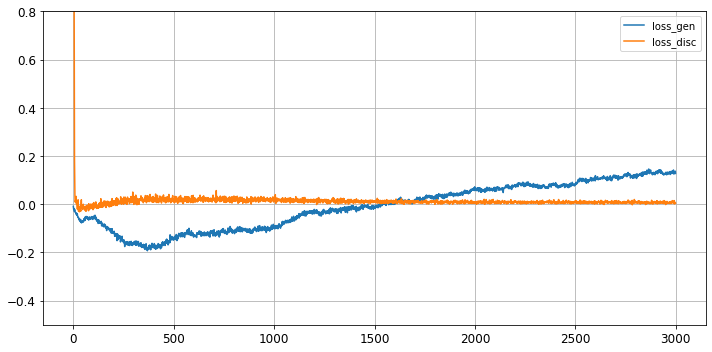

In [10]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [11]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (400, 2)


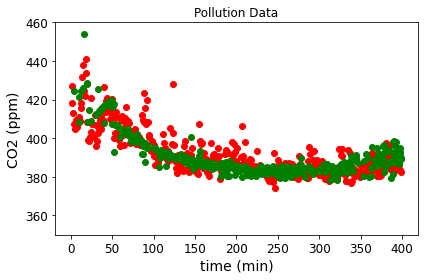

In [12]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([400, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)

predicted_values[:,:]=(predicted_values[:,:])
predicted_values = scaler.inverse_transform(predicted_values)

    
print("Predicted Values:",predicted_values.shape)
plt.scatter(X_train, y_train,c='r',label='sample data')
plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green',label='generated data')

plt.title("Pollution Data")
plt.ylabel('CO2 (ppm)')
plt.ylim(350,460)
plt.xlabel('time (min)')

plt.tight_layout()
    

In [13]:
os.system('mkdir result_dataset')

export_excel(predicted_values[:,:], 'result_dataset/predicted_values')
#x=[:0],y=[:1],z=[:2]

print('made result_Dataset')


made result_Dataset


### Applying the prediction function

##Prediction

input_test : (100, 2)


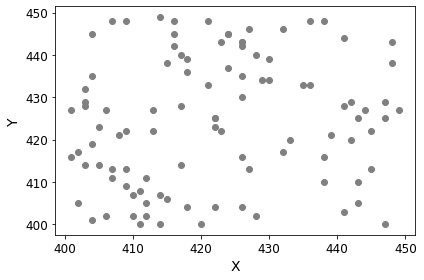

In [14]:
# define these for desired prediction
n_points = 100
x_input = np.random.randint(low=400, high=450, size=[n_points, n_features])

y_min = -1
y_max = 1


predictthis = scaler.transform(x_input)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(x_input[:,0],x_input[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [15]:
X_generated = wgan.predict(input_test, scaler)

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (100, 2)
input: (

Generated Data: (99, 2)


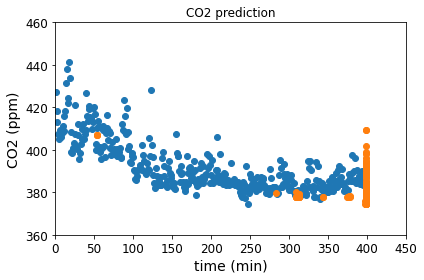

In [16]:
print("Generated Data:",X_generated.shape)

plt.scatter(X_train, y_train,label="Sample Data")
plt.scatter(X_generated[:,0],X_generated[:,1], label='predict data')
plt.title('CO2 prediction')
plt.ylabel('CO2 (ppm)')
plt.ylim(360,460)
plt.xlabel('time (min)')
plt.xlim(0,450)
plt.tight_layout()